<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Vaccine/blob/main/COVID-19%20Vaccine%20Sentiment%20Analysis%20using%20RNN-LSTM%20with%20TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


**Import Data**

In [5]:
df= pd.read_csv('/content/drive/MyDrive/file.csv')

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,NaN,@ANI Isn't it the best poll promise ever?? Fre...,en,['ani'],[],[],0,0,0,[],[],https://twitter.com/to_fly_to_live/status/1319...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN
1,1319174381503852544,1319174381503852544,2020-10-22 12:40:56 India Standard Time,2020-10-22,12:40:56,530,864189073858084864,utkarshsinha07,Utkarsh Sinha,NaN,Now states shall have wait for thier Vidhan Sa...,en,[],[],[],0,0,0,['biharpolls'],[],https://twitter.com/utkarshsinha07/status/1319...,NaN,https://twitter.com/ani/status/131915369740690...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1319174114779643905,1319174114779643905,2020-10-22 12:39:52 India Standard Time,2020-10-22,12:39:52,530,116114711,batolebazi,BATOLEBAZI,NaN,जिस मदारी ने ट्रेन तक नहीं चलाई और तुम पत्नी व...,hi,[],[],['https://pbs.twimg.com/media/Ek6l2igUwAEbmnD....,0,0,1,"['biharpolls', 'covidvaccine']",[],https://twitter.com/BATOLEBAZI/status/13191741...,NaN,NaN,1,https://pbs.twimg.com/media/Ek6l2igUwAEbmnD.jpg,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1319174091232833536,1319172728851591174,2020-10-22 12:39:47 India Standard Time,2020-10-22,12:39:47,530,1249338116,bak_sahil,sahil,NaN,@MisseeMonis They said vaccine for all but not...,en,['misseemonis'],[],[],0,0,0,[],[],https://twitter.com/bak_sahil/status/131917409...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1105377223', 'username': 'MisseeM...",NaN,NaN,NaN,NaN
4,1319174029488476160,1319174029488476160,2020-10-22 12:39:32 India Standard Time,2020-10-22,12:39:32,530,804225890062319617,ivibhatweedy,𝐯𝐢𝐛𝐬 | 🐺,NaN,"BJP really presenting ""free COVID vaccine"" as ...",en,[],[],[],0,0,4,[],[],https://twitter.com/ivibhatweedy/status/131917...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


**Only Englsih language tweet**

In [6]:
df = df[df['language']=='en']

In [7]:
data = df[['tweet']]
data.head()

,tweet
0,@ANI Isn't it the best poll promise ever?? Fre...
1,Now states shall have wait for thier Vidhan Sa...
3,@MisseeMonis They said vaccine for all but not...
4,"BJP really presenting ""free COVID vaccine"" as ..."
5,Another dose of daily miserablism from Planet ...


In [8]:
data= data.reset_index(drop=True)
data['process_tweet'] = data['tweet'].copy()
data.head()

,tweet,process_tweet
0,@ANI Isn't it the best poll promise ever?? Fre...,@ANI Isn't it the best poll promise ever?? Fre...
1,Now states shall have wait for thier Vidhan Sa...,Now states shall have wait for thier Vidhan Sa...
2,@MisseeMonis They said vaccine for all but not...,@MisseeMonis They said vaccine for all but not...
3,"BJP really presenting ""free COVID vaccine"" as ...","BJP really presenting ""free COVID vaccine"" as ..."
4,Another dose of daily miserablism from Planet ...,Another dose of daily miserablism from Planet ...


**Import library**

In [10]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 39.4 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 
     |████████████████████████████████| 895 kB 62.4 MB/s 
     |████████████████████████████████| 61 kB 497 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import transformers as ppb

from tqdm import tqdm_notebook as tqdm
import random
import matplotlib.pyplot as plt
import warnings


#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras.preprocessing.sequence import pad_sequences #######
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data





**Data procesing**

In [12]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines

  return txt


In [13]:
data['process_tweet'] = data['process_tweet'].apply(clean_data)

**Remove Stopwords**

In [15]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(txt):
  rmv_stpwords = [i for i in txt.split() if i not in stopwords]
  rmv_stpwords_join = ' '.join(rmv_stpwords)
  return rmv_stpwords_join


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
data['process_tweet'] = data['process_tweet'].apply(remove_stopwords)

data.head()#after removing stopwords

,tweet,process_tweet
0,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promise ever free covid vaccine...
1,Now states shall have wait for thier Vidhan Sa...,states shall wait thier vidhan sabha election ...
2,@MisseeMonis They said vaccine for all but not...,said vaccine free covid vaccine new lakhs rs e...
3,"BJP really presenting ""free COVID vaccine"" as ...",bjp really presenting free covid vaccine state...
4,Another dose of daily miserablism from Planet ...,another dose daily miserablism planet grauniad...


**PorterStemmer**

In [17]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [18]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

In [19]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,tweet,process_tweet
0,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
2,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
3,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
4,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


**Using TextBlob calculate the polarity**

In [20]:
def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [21]:
data['Polarity'] = data['process_tweet'].apply(get_text_polarity)

**Labeling using the polarity score**

In [22]:
#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'


In [23]:
data['Sentiment'] = data['Polarity'].apply(get_text_analysis)

In [24]:
#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment','process_tweet' ]]

possible_labels = data.Sentiment.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label'] = data.Sentiment.replace(label_dict)


print(label_dict)

data.head()

{'Positive': 0, 'Strongly Positive': 1, 'Neutral': 2, 'Negative': 3, 'Strongly Negative': 4}


,Sentiment,process_tweet,label
0,Positive,isnt best poll promis ever free covid vaccin v...,0
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...,1
2,Positive,said vaccin free covid vaccin new lakh rs ever...,0
3,Positive,bjp realli present free covid vaccin state man...,0
4,Neutral,anoth dose daili miserabl planet grauniad sub ...,2


Text(0, 0.5, 'Label')

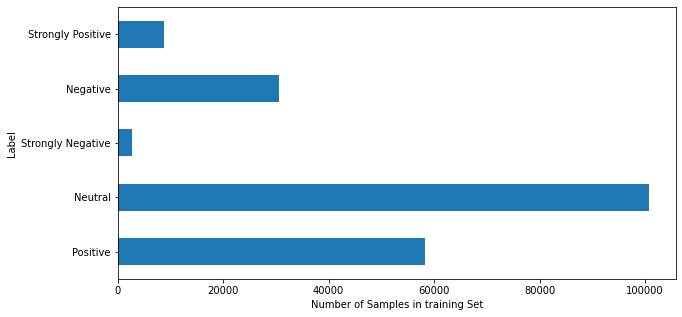

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = data['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')

**Total Unique words after pre processing**

In [26]:
unique_words = set(data['process_tweet'])
count = 0
for word in unique_words:
  count += 1
print(count)

163967


**Tokenization**

In [27]:
#tokenization
tokenizer = Tokenizer(num_words=163967, split=' ')
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.


tokenizer.fit_on_texts(data['process_tweet'].values)

X = tokenizer.texts_to_sequences(data['process_tweet'].values)

In [28]:
X[:3] #before padding

[[200,
  247,
  365,
  199,
  225,
  144,
  2,
  1,
  291,
  1808,
  59,
  16,
  291,
  91,
  2430,
  104,
  177,
  1116,
  364,
  1,
  134,
  860,
  1808,
  7304,
  9652,
  90,
  345,
  105,
  1947,
  450,
  733],
 [134, 1771, 59, 7777, 28152, 14302, 93, 3, 2, 1, 10978],
 [52, 1, 144, 2, 1, 37, 1269, 1405, 124, 712, 576, 7532]]

**Padding**

In [29]:
#padding to make all text vector to same length

X = pad_sequences(X)

X[:3] #after padding

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   200,   247,   365,   199,   225,   144,     2,
            1,   291,  1808,    59,    16,   291,    91,  2430,   104,
          177,  1116,   364,     1,   134,   860,  1808,  7304,  9652,
           90,   345,   105,  1947,   450,   733],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   134,  1771,    59,  7777, 28152,
        14302,    93,     3,     2,     1, 10978],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    

**RNN Model**

In [30]:
#creating models

model= Sequential()
model.add(Embedding(163967, 256 , input_length=X.shape[1]))
model.add(Dropout(0.3))


model.add(LSTM(128 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))
model.add(LSTM(128,dropout=0.3 , recurrent_dropout=0.3))


model.add(Dense(5 , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 51, 256)           41975552  
                                                                 
 dropout (Dropout)           (None, 51, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 51, 128)           197120    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 42,304,901
Trainable params: 42,304,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [32]:
#one hot encoding

y = pd.get_dummies(data['Sentiment']).values

[print(data['Sentiment'][i] ,y[i]) for i in range(0,5)]

Positive [0 0 1 0 0]
Strongly Positive [0 0 0 0 1]
Positive [0 0 1 0 0]
Positive [0 0 1 0 0]
Neutral [0 1 0 0 0]


[None, None, None, None, None]

**Data split**

In [33]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 22)

In [34]:
#trannig model
batch_size = 128
epochs = 5

**Tranning the model**

In [35]:
history = model.fit(x_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)

Epoch 1/5
1131/1131 [==============================] - 1483s 1s/step - loss: 0.2585 - accuracy: 0.9083 - val_loss: 0.0808 - val_accuracy: 0.9762
Epoch 2/5
1131/1131 [==============================] - 1465s 1s/step - loss: 0.0613 - accuracy: 0.9803 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 3/5
1131/1131 [==============================] - 1472s 1s/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 4/5
1131/1131 [==============================] - 1471s 1s/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0646 - val_accuracy: 0.9808
Epoch 5/5
1131/1131 [==============================] - 1471s 1s/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0572 - val_accuracy: 0.9837


In [36]:
%%time
score = model.evaluate(x_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

315/315 [==============================] - 43s 135ms/step - loss: 0.0558 - accuracy: 0.9832

ACCURACY: 0.9832363128662109
LOSS: 0.055826835334300995
CPU times: user 1min 15s, sys: 3.5 s, total: 1min 18s
Wall time: 42.7 s


In [37]:
predictions = model.predict(x_test)
pred1 = np.argmax(predictions , axis=1)
pred1[:10]

array([2, 2, 1, 1, 2, 2, 3, 0, 0, 0])

In [38]:
y_test = np.argmax(y_test , axis=1)


In [39]:
print(confusion_matrix(y_test , pred1))

[[ 5848    47   114    23     0]
 [   46 20093    53     0     2]
 [  103    35 11486     0    61]
 [   56     0     0   485     0]
 [    1     1   132     0  1620]]


**Classification Report**

In [40]:
print(classification_report(y_test , pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6032
           1       1.00      0.99      1.00     20194
           2       0.97      0.98      0.98     11685
           3       0.95      0.90      0.92       541
           4       0.96      0.92      0.94      1754

    accuracy                           0.98     40206
   macro avg       0.97      0.95      0.96     40206
weighted avg       0.98      0.98      0.98     40206



**Accuracy**

In [41]:
accuracy_score(y_test , pred1)

0.9832363328856389

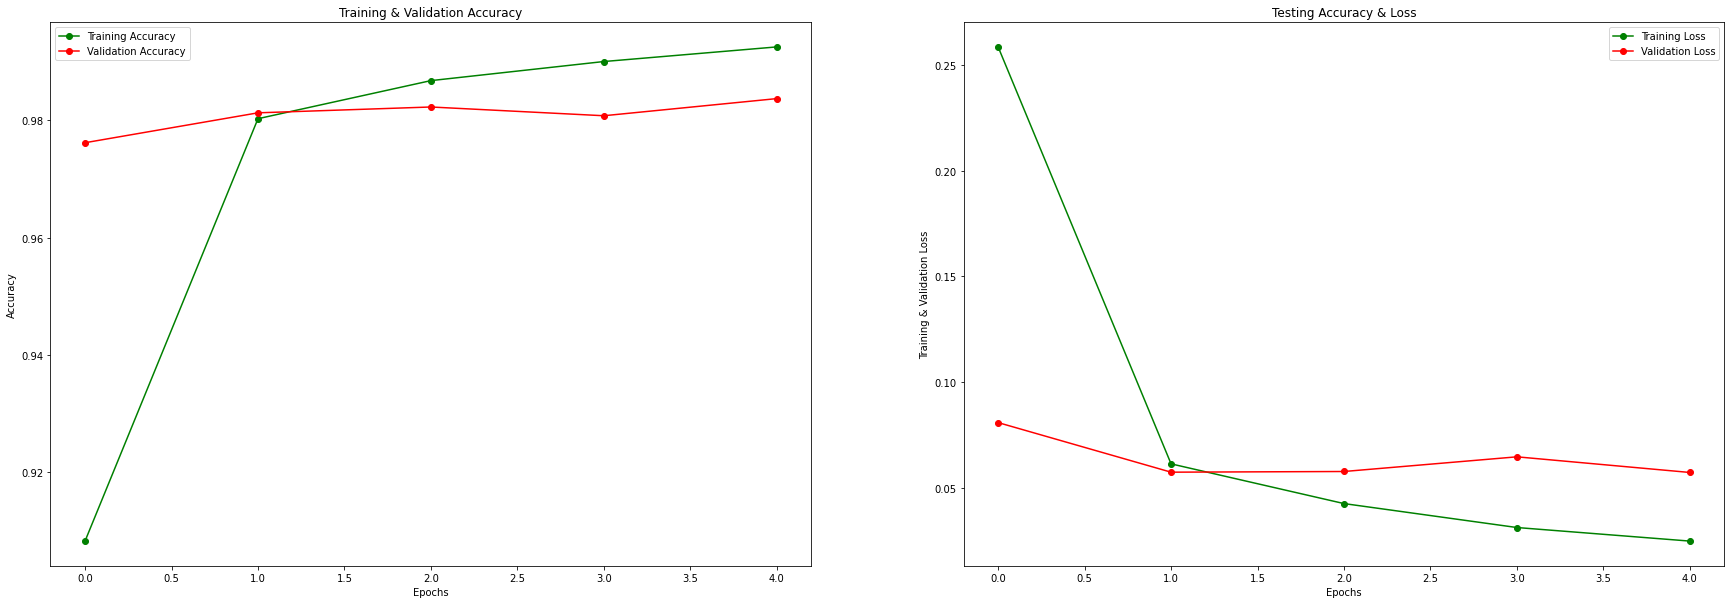

In [42]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')

ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()